In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Homestays_Data.xlsx")

## EDA

In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.shape

(74111, 29)

In [5]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
df.dtypes

id                                 int64
log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
description                       object
first_review              datetime64[ns]
host_has_profile_pic              object
host_identity_verified            object
host_response_rate               float64
host_since                datetime64[ns]
instant_bookable                  object
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
name                              object
neighbourhood                     object
number_of_reviews                  int64
review_scores_ra

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [9]:
df= df.dropna()

##### Heatmap

C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_30124\1529072419.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds']].corr() #Filtering the correlation matrix


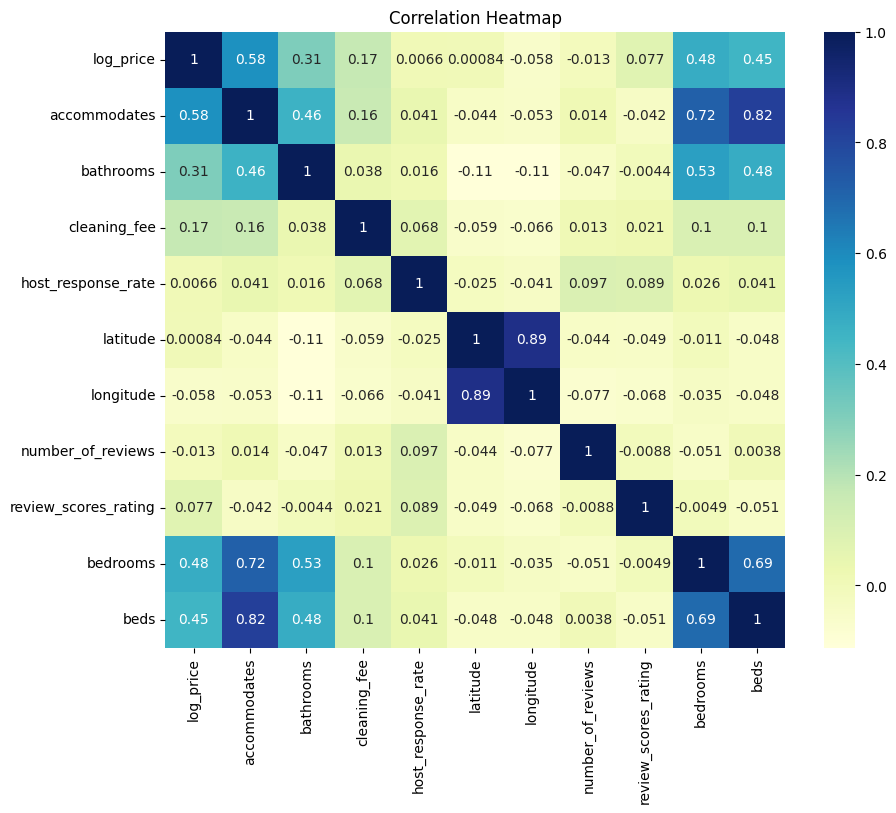

In [10]:
correlation_matrix = df[[ 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds']].corr() #Filtering the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


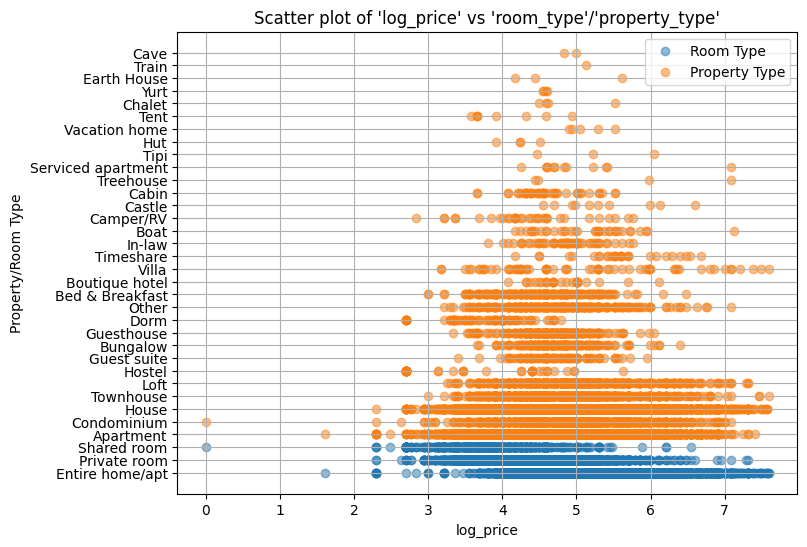

In [11]:
plt.figure(figsize=(8, 6))   #Scatter Plot between Log_price vs room type and property_type
plt.scatter(df['log_price'], df['room_type'], alpha=0.5, label='Room Type')
plt.scatter(df['log_price'], df['property_type'], alpha=0.5, label='Property Type')
plt.title(f"Scatter plot of '{'log_price'}' vs '{'room_type'}'/'{'property_type'}'")
plt.xlabel('log_price')
plt.ylabel('Property/Room Type')
plt.legend()
plt.grid(True)
plt.show()


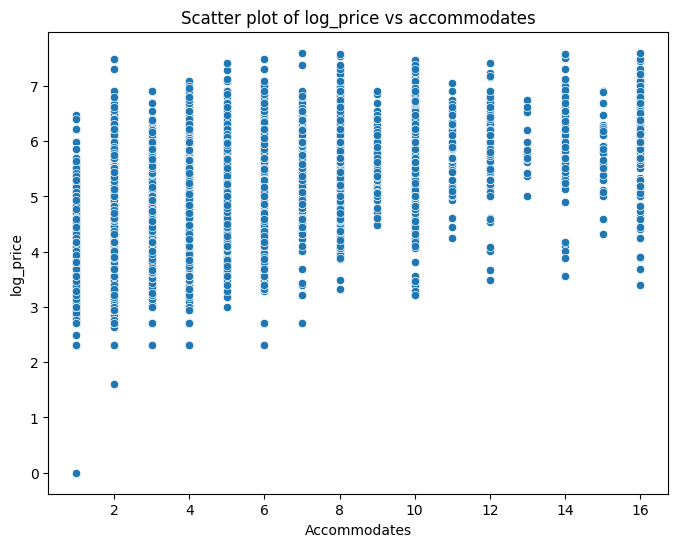

In [12]:
plt.figure(figsize=(8, 6)) #Scatter Plot between Log_price vs log_price vs accommodates
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.title('Scatter plot of log_price vs accommodates')
plt.xlabel('Accommodates')
plt.ylabel('log_price')
plt.show()

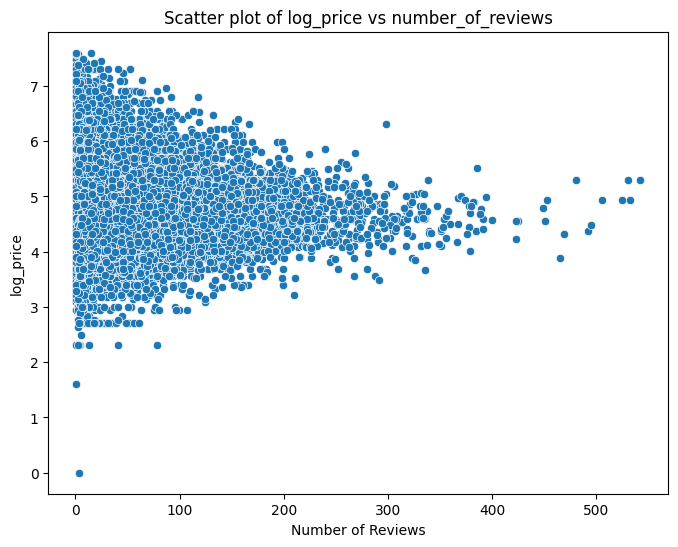

In [13]:
plt.figure(figsize=(8, 6)) #Scatter Plot between Log_price vs log_price vs number_of_reviews
sns.scatterplot(x='number_of_reviews', y='log_price', data=df)
plt.title('Scatter plot of log_price vs number_of_reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('log_price')
plt.show()

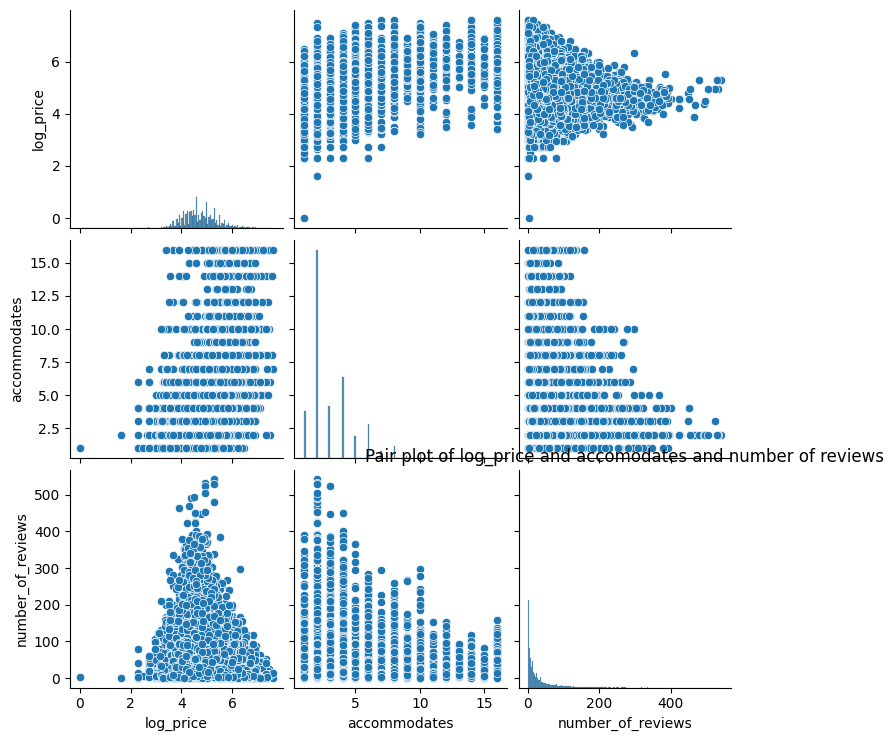

In [14]:
sns.pairplot(df[['log_price', 'accommodates', 'number_of_reviews']])  
plt.title('Pair plot of log_price and accomodates and number of reviews')
plt.show()

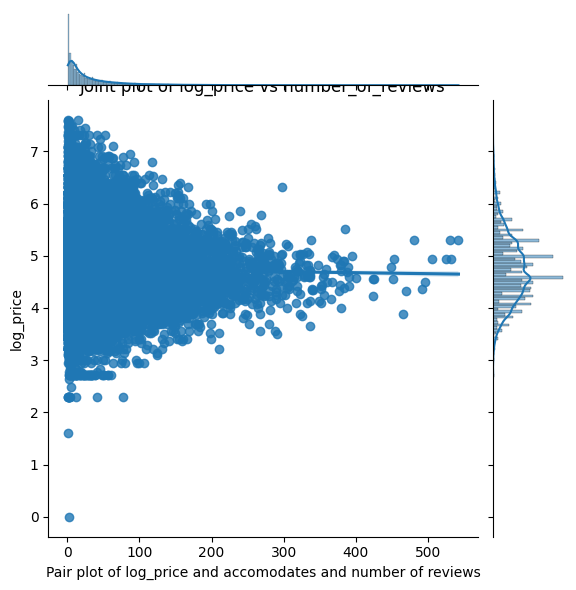

In [15]:
sns.jointplot(x='number_of_reviews', y='log_price', data=df, kind='reg') #Joint Plot between log_price vs number_of_reviews
plt.title('Joint plot of log_price vs number_of_reviews')
plt.xlabel('Pair plot of log_price and accomodates and number of reviews')
plt.ylabel('log_price')
plt.show()

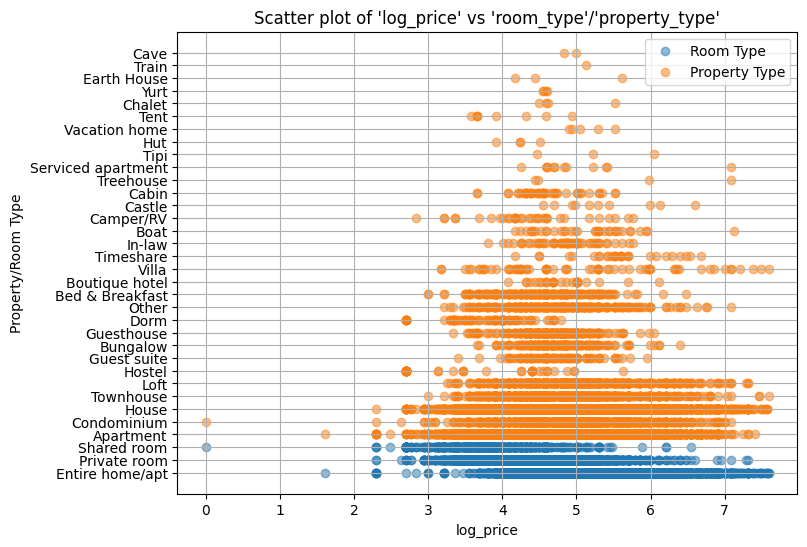

In [16]:
x_column = 'log_price'
y_column1 = 'room_type'
y_column2 = 'property_type'

plt.figure(figsize=(8, 6))
plt.scatter(df['log_price'], df['room_type'], alpha=0.5, label='Room Type')
plt.scatter(df['log_price'], df['property_type'], alpha=0.5, label='Property Type')
plt.title(f"Scatter plot of '{x_column}' vs '{y_column1}'/'{y_column2}'")
plt.xlabel('log_price')
plt.ylabel('Property/Room Type')
plt.legend()
plt.grid(True)
plt.show()


### Feature Engineering 

In [17]:

df['host_since'] = pd.to_datetime(df['host_since'])

In [18]:
df['Host_Tenure'] = (pd.to_datetime('now') - df['host_since']).dt.days / 365.25

C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_30124\1875516937.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Host_Tenure'] = (pd.to_datetime('now') - df['host_since']).dt.days / 365.25


In [19]:
display (df[['host_since', 'Host_Tenure']].head())

,host_since,Host_Tenure
1,2017-06-19,6.885695
2,2016-10-25,7.534565
5,2017-06-07,6.918549
7,2013-05-18,10.973306
8,2015-06-04,8.928131


In [20]:
import ast

In [21]:
def parse_amenities(x):
    try:
        amenities_list = ast.literal_eval(x)
        return len(amenities_list)
    except (SyntaxError, ValueError):
        return None  

df['Amenities_Count'] = df['amenities'].apply(parse_amenities)

df.dropna(subset=['Amenities_Count'], inplace=True)

display(df[['amenities', 'Amenities_Count']].head())


,amenities,Amenities_Count
221,{},0.0
533,"{""translation missing: en.hosting_amenity_49"",...",2.0
2232,"{""Smoking allowed"",""translation missing: en.ho...",3.0
2309,{},0.0
2374,"{""Family/kid friendly""}",1.0


In [22]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Host_Tenure', 'Amenities_Count'],
      dtype='object')

In [23]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['Days_Since_Last_Review'] = (pd.to_datetime('today') - df['last_review']).dt.days
display(df[['last_review', 'Days_Since_Last_Review']].head())

,last_review,Days_Since_Last_Review
221,2017-02-17,2637
533,2017-04-27,2568
2232,2017-04-21,2574
2309,2017-07-23,2481
2374,2017-09-16,2426


### Geospatial Analysis


##### Heatmap of Average Prices by Neighborhood

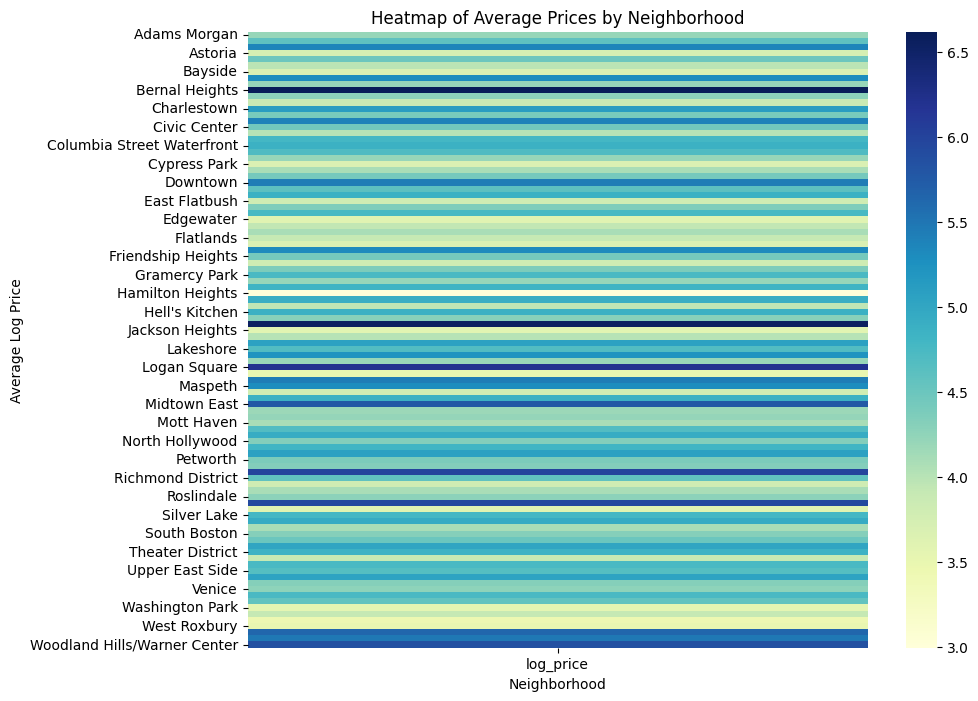

In [24]:
plt.figure(figsize=(10, 8))  # Making Heatmap for the average prices by Neighbourhood
avg_price_by_neighborhood = df.groupby('neighbourhood')['log_price'].mean().reset_index()
sns.heatmap(avg_price_by_neighborhood.pivot_table(index='neighbourhood', columns=None, values='log_price'), cmap='YlGnBu')
plt.title('Heatmap of Average Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Log Price')
plt.show()

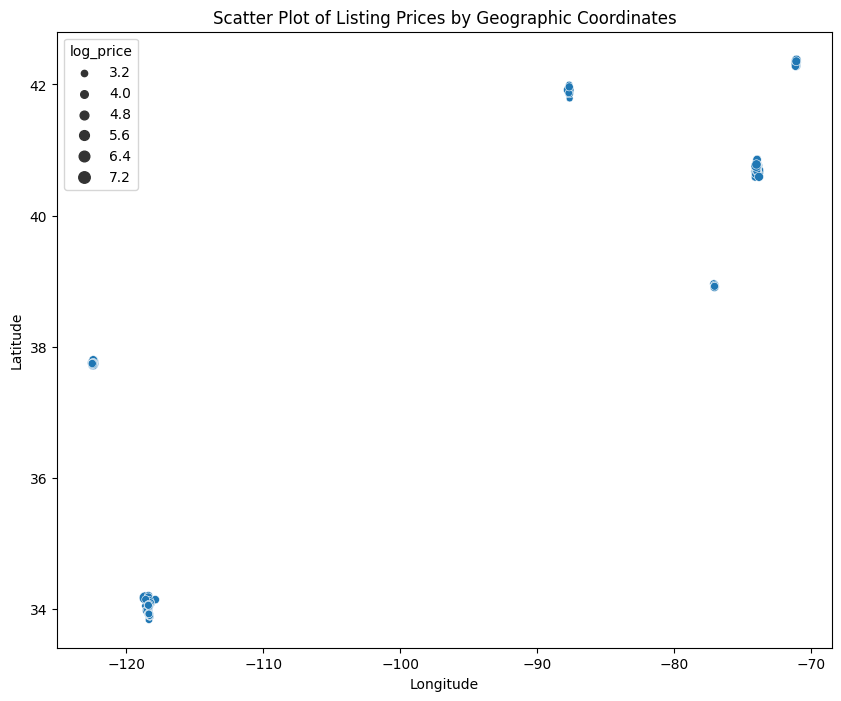

In [25]:
plt.figure(figsize=(10, 8))  # Scatter Plot with Geographic Coordinates
sns.scatterplot(x='longitude', y='latitude', size='log_price', data=df)
plt.title('Scatter Plot of Listing Prices by Geographic Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

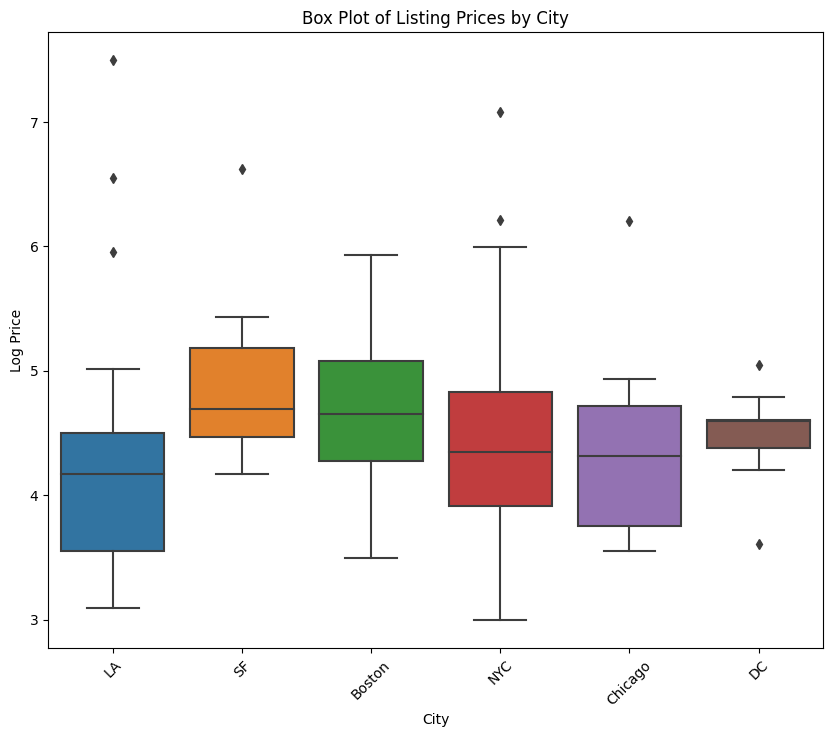

In [26]:
plt.figure(figsize=(10, 8))  # Box Plot of Prices by City
sns.boxplot(x='city', y='log_price', data=df)
plt.title('Box Plot of Listing Prices by City')
plt.xlabel('City')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()

##### To visualize the prize distribution between `latitude` and `longitude` using map

In [27]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import folium

In [29]:
map_center = [df['latitude'].mean(), df['longitude'].mean()]   # Creating a map centered around the mean latitude and longitude
m = folium.Map(location=map_center, zoom_start=10)

for index, row in df.iterrows():
    popup_text = f"Price: ${row['log_price']}"
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text).add_to(m)

m  #Displaying the map


In [30]:
city_center = [df['latitude'].mean(), df['longitude'].mean()]  # Calculating the mean latitude and longitude of the listings
m = folium.Map(location=city_center, zoom_start=12)

for index, row in df.iterrows():
    popup_text = f"Price: ${row['log_price']}"
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text).add_to(m)

m  # Displaying the map


### Sentiment Analysis on Textual Data

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abhigyan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
sid = SentimentIntensityAnalyzer() #initializing the Sentiment Intensity Analyzer

In [34]:
sentiment_scores = []  # Iterating over each description text and extract sentiment scores
for description in df['description']:
    scores = sid.polarity_scores(description)
    sentiment_scores.append(scores)

df1 = pd.DataFrame(sentiment_scores)
df_ = pd.concat([df, df1], axis=1)

display(df_[['description', 'neg', 'neu', 'pos', 'compound']].head()) # Displaying the DataFrame with sentiment scores


,description,neg,neu,pos,compound
221,"You're fashionable, not trendy. . . connected ...",NaN,NaN,NaN,NaN
533,All amenities are crossed out. Read entire des...,NaN,NaN,NaN,NaN
2232,Very comfortable Townhouse walking distance to...,NaN,NaN,NaN,NaN
2309,The Donatello is a hotel/timeshare and is one ...,NaN,NaN,NaN,NaN
2374,"Cozy, bright, and spacious 2 bedroom with a lo...",NaN,NaN,NaN,NaN


In [35]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
Host_Tenure               0
Amenities_Count           0
Days_Since_Last_Review    0
dtype: int64

##### Amenities are most associated with higher or lower prices

In [36]:
from scipy import stats

In [37]:
amenities_dummies = df['amenities'].str.get_dummies(sep=', ')

In [38]:
amenity_correlations = {}  # Iterating over each amenity and calculating the correlation with log_price
for col in amenities_dummies.columns:
    amenties1, _ = stats.pointbiserialr(amenities_dummies[col], df['log_price'])
    ranks = stats.rankdata(amenities_dummies[col])
    rank_biserial_corr, _ = stats.pointbiserialr(ranks, df['log_price'])
    amenity_correlations[col] = {'Point Biserial Correlation': amenties1,
                                 'Rank Biserial Correlation': rank_biserial_corr}
df2 = pd.DataFrame(amenity_correlations).T
df3 = df2.reindex(df2.abs().sort_values(by='Point Biserial Correlation', ascending=False).index)

display(df3) #Displaying the amenties which are most associated with higher or lower prices

,Point Biserial Correlation,Rank Biserial Correlation
"{""Wireless Internet"",""Pets allowed"",""Suitable for events"",""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",0.271886,0.271886
{},0.226903,0.226903
"{""Wireless Internet"",""Family/kid friendly"",""Suitable for events"",""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50""}",0.224350,0.224350
"{""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",-0.222497,-0.222497
"{""Free parking on premises"",""Family/kid friendly"",""Suitable for events""}",0.217246,0.217246
"{""Wireless Internet"",""Smoke detector""}",-0.148852,-0.148852
"{""Family/kid friendly"",""Host greets you""}",0.121039,0.121039
"{""Wireless Internet"",""translation missing: en.hosting_amenity_49""}",-0.117949,-0.117949
"{""Wireless Internet"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",-0.101296,-0.101296
"{""Pets allowed""}",-0.097286,-0.097286


### Categorical Data Encoding

In [39]:
categorical_columns = ['room_type', 'city', 'property_type']

In [40]:
df4 = pd.get_dummies(df, columns=categorical_columns) #Categorical encoding via one hot encoding
display(df4.head())

,id,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,first_review,...,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Dorm,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse
221,1550146,5.010635,{},4,1.0,Real Bed,moderate,True,"You're fashionable, not trendy. . . connected ...",2015-09-10,...,0,0,0,0,0,1,0,0,0,0
533,8036967,3.465736,"{""translation missing: en.hosting_amenity_49"",...",1,1.0,Real Bed,strict,True,All amenities are crossed out. Read entire des...,2017-01-16,...,0,0,0,0,0,0,0,0,0,0
2232,18386105,4.644391,"{""Smoking allowed"",""translation missing: en.ho...",2,2.0,Real Bed,flexible,True,Very comfortable Townhouse walking distance to...,2017-02-26,...,0,0,0,0,0,0,0,0,0,1
2309,19159737,5.433722,{},4,1.0,Real Bed,strict,True,The Donatello is a hotel/timeshare and is one ...,2015-10-31,...,0,0,0,0,0,0,0,0,0,0
2374,10946042,4.867534,"{""Family/kid friendly""}",4,1.0,Real Bed,strict,True,"Cozy, bright, and spacious 2 bedroom with a lo...",2017-09-16,...,0,0,0,0,0,1,0,0,0,0


In [41]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_Last_Review
221,1550146,5.010635,House,Entire home/apt,{},4,1.0,Real Bed,moderate,True,...,Echo Park,8,93.0,https://a0.muscache.com/im/pictures/64128774/f...,90026,2.0,2.0,10.765229,0.0,2637
533,8036967,3.465736,Apartment,Private room,"{""translation missing: en.hosting_amenity_49"",...",1,1.0,Real Bed,strict,True,...,Hawthorne,6,100.0,https://a0.muscache.com/im/pictures/40f93f8b-7...,90250,0.0,1.0,10.023272,2.0,2568
2232,18386105,4.644391,Townhouse,Private room,"{""Smoking allowed"",""translation missing: en.ho...",2,2.0,Real Bed,flexible,True,...,Venice,2,100.0,https://a0.muscache.com/im/pictures/3d49b799-e...,90291,3.0,1.0,14.242300,3.0,2574
2309,19159737,5.433722,Apartment,Private room,{},4,1.0,Real Bed,strict,True,...,Downtown,7,100.0,https://a0.muscache.com/im/pictures/111393778/...,94102,1.0,2.0,9.582478,0.0,2481
2374,10946042,4.867534,House,Entire home/apt,"{""Family/kid friendly""}",4,1.0,Real Bed,strict,True,...,East Boston,1,100.0,https://a0.muscache.com/im/pictures/11ee93f2-2...,2128,2.0,2.0,11.351129,1.0,2426


In [42]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review'],
      dtype='object')

In [43]:
df4.dtypes

id                                        int64
log_price                               float64
amenities                                object
accommodates                              int64
bathrooms                               float64
bed_type                                 object
cancellation_policy                      object
cleaning_fee                               bool
description                              object
first_review                     datetime64[ns]
host_has_profile_pic                     object
host_identity_verified                   object
host_response_rate                      float64
host_since                       datetime64[ns]
instant_bookable                         object
last_review                      datetime64[ns]
latitude                                float64
longitude                               float64
name                                     object
neighbourhood                            object
number_of_reviews                       

In [44]:
df[['room_type', 'city', 'property_type']].dtypes

room_type        object
city             object
property_type    object
dtype: object

In [45]:
df4.columns

Index(['id', 'log_price', 'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_Boston', 'city_Chicago', 'city_DC',
       'city_LA', 'city_NYC', 'city_SF', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Tent', 'property_type_Townhouse'],
    

In [46]:
df4.dtypes

id                                        int64
log_price                               float64
amenities                                object
accommodates                              int64
bathrooms                               float64
bed_type                                 object
cancellation_policy                      object
cleaning_fee                               bool
description                              object
first_review                     datetime64[ns]
host_has_profile_pic                     object
host_identity_verified                   object
host_response_rate                      float64
host_since                       datetime64[ns]
instant_bookable                         object
last_review                      datetime64[ns]
latitude                                float64
longitude                               float64
name                                     object
neighbourhood                            object
number_of_reviews                       

In [47]:
df4 = df4.drop(['zipcode','amenities', 'cancellation_policy', 'cleaning_fee','first_review','host_since', 'last_review',  'description', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'name', 'neighbourhood', 'thumbnail_url'], axis=1)

In [48]:
df4 = df4.drop(['bed_type'], axis=1)

In [49]:
df4[['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room',
                    'property_type_Apartment', 'property_type_House', 'property_type_Condominium', 
                   ]].dtypes


room_type_Entire home/apt    uint8
room_type_Private room       uint8
room_type_Shared room        uint8
property_type_Apartment      uint8
property_type_House          uint8
property_type_Condominium    uint8
dtype: object

### Model Development and Training

In [50]:
X = df4.drop(['id', 'log_price'], axis=1)  # Features segregation on X and y
y = df4['log_price']  

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
lr_model = LinearRegression() #initiallizing the linear regression model

In [54]:
lr_model.fit(X_train, y_train) #Fitting the Linear regression model on the X_train and y_train

LinearRegression()

In [55]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [56]:
X_test

,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Host_Tenure,...,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Dorm,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse
60381,2,1.0,0.90,40.634311,-74.025519,8,100.0,1.0,1.0,9.771389,...,0,0,0,0,0,0,0,0,0,0
12216,2,1.0,1.00,40.795504,-73.949448,45,94.0,1.0,1.0,8.062971,...,0,0,0,0,0,0,0,0,0,0
51287,2,2.0,1.00,40.679917,-73.956945,3,80.0,1.0,1.0,10.130048,...,0,0,0,0,0,1,0,0,0,0
12047,2,1.0,0.97,34.173953,-118.638185,1,80.0,1.0,2.0,8.930869,...,0,0,0,0,0,1,0,0,0,0
62156,2,1.0,1.00,40.708581,-73.894731,13,95.0,1.0,1.0,11.455168,...,0,0,0,0,0,0,0,0,0,0
70984,3,1.0,1.00,40.679919,-73.959016,11,91.0,1.0,1.0,11.989049,...,0,0,0,0,0,0,0,0,0,0
72731,2,1.0,0.90,37.745421,-122.498063,50,92.0,1.0,1.0,9.557837,...,0,0,0,0,0,1,0,0,0,0
20209,4,1.0,1.00,40.692758,-73.970614,1,100.0,2.0,2.0,12.900753,...,0,0,0,0,0,0,0,0,0,0
45610,1,1.0,1.00,40.800342,-73.966376,19,82.0,1.0,1.0,13.382615,...,0,0,0,0,0,0,0,0,0,0
23657,1,1.0,1.00,40.728598,-73.999708,14,94.0,1.0,1.0,11.945243,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X_test.columns

Index(['accommodates', 'bathrooms', 'host_response_rate', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds', 'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_Boston', 'city_Chicago', 'city_DC',
       'city_LA', 'city_NYC', 'city_SF', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Tent', 'property_type_Townhouse'],
      dtype='object')

In [58]:
lr_pred = lr_model.predict(X_test) #Predicting the Linear Regression model

In [59]:
lr_mse = mean_squared_error(y_test, lr_pred) 

In [60]:
display("Linear Regression MSE:", lr_mse) #Displaying the Mean Square error value of Linear Regression

'Linear Regression MSE:'

0.29950549917196967

In [61]:
rf_model = RandomForestRegressor(random_state=42)  #Initiallizing the random forest model
rf_model.fit(X_train, y_train)  #Fitting the random forest model on the X_train and y_train

RandomForestRegressor(random_state=42)

In [62]:
rf_pred = rf_model.predict(X_test)  #Predicting the random forest model on the X_test

In [63]:
rf_mse = mean_squared_error(y_test, rf_pred)

In [64]:
display("RandomForest MSE:", rf_mse) #Displaying the Mean Square error of the random forest model

'RandomForest MSE:'

0.549028612521781

In [65]:
gb_model = GradientBoostingRegressor(random_state=42)  #Initiallizing the Gradient Boosting Regressor
gb_model.fit(X_train, y_train) #Fitting the Gradient Boosting Regressor on the X_train and y_train

GradientBoostingRegressor(random_state=42)

In [66]:
gb_pred = gb_model.predict(X_test) #Fitting the Gradient Boosting Regressor on the X_test

In [67]:
gb_mse = mean_squared_error(y_test, gb_pred) 

In [68]:
display("GradientBoosting MSE:", gb_mse)  #Displaying the Mean Square error of the Gradient Boosting Regressor

'GradientBoosting MSE:'

0.5692248059143008

### Model Optimization and Validation

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [70]:
scoring = 'neg_mean_squared_error'  

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
models = {  #Applying the models
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [73]:
params_grid = {       #Hyperparameter Tuning with the Grid Search
    'Linear Regression': {},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5]}
}

In [74]:
best_models = {}   #Initiallizing the loop for selecting the best model

for name, model in models.items():
    grid_search = GridSearchCV(model, params_grid[name], scoring=scoring, cv=5)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

In [75]:
cv_results = {}  #Initiallizing the loop for selecting the best model with the help of Cross Validation model
for name, model in best_models.items():
    cv_score = cross_val_score(model, X_train, y_train, scoring=scoring, cv=5)
    cv_results[name] = cv_score

In [76]:
for name, scores in cv_results.items():
    print(f"{name} Cross-Validation MSE: {scores.mean()}") #Printing the mean square error for the  cross-validation 

Linear Regression Cross-Validation MSE: -0.3641059080813346
Random Forest Cross-Validation MSE: -0.3032990652111214
Gradient Boosting Cross-Validation MSE: -0.29734205010421244


In [77]:
cv_mean_scores = {name: scores.mean() for name, scores in cv_results.items()}
best_model_name = min(cv_mean_scores, key=cv_mean_scores.get)
best_model = best_models[best_model_name]

In [78]:
for name, score in cv_mean_scores.items():
    print(f"{name} Mean Cross-Validation MSE: {score}") #Printing the mean square error for the mean cross-validation 

Linear Regression Mean Cross-Validation MSE: -0.3641059080813346
Random Forest Mean Cross-Validation MSE: -0.3032990652111214
Gradient Boosting Mean Cross-Validation MSE: -0.29734205010421244


In [79]:
best_model.fit(X_train, y_train)  #We are finallizing the model here

LinearRegression()

In [80]:
y_pred = best_model.predict(X_test)   #Evaluating the Final Model
print(f"Final Model ({best_model_name}) MSE on Test Data: {mean_squared_error(y_test, y_pred)}")  #Printing the name of the best model and mean square error on the Test data

Final Model (Linear Regression) MSE on Test Data: 0.29950549917196967


### Feature Importance and Model Insights:

In [81]:
if isinstance(best_model, LinearRegression):  # 'best_model' is a trained as a Linear Regression model
    coefficients = best_model.coef_
    feature_names = X_train.columns
    df4_ = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
    df5 = df4_.sort_values(by="Coefficient", ascending=False)
    print(df5)
else:
    print("Feature importance is not available for this model type.")


                          Feature  Coefficient
15                    city_Boston    21.949526
19                       city_NYC    21.101615
17                        city_DC    20.305639
3                        latitude     1.868505
23             property_type_Boat     1.211084
16                   city_Chicago     0.727381
12      room_type_Entire home/apt     0.376601
31        property_type_Townhouse     0.307700
26           property_type_Hostel     0.249044
1                       bathrooms     0.148053
0                    accommodates     0.128887
7                        bedrooms     0.109485
29            property_type_Other     0.095253
27            property_type_House     0.053182
21        property_type_Apartment     0.028741
9                     Host_Tenure     0.021807
22  property_type_Bed & Breakfast     0.007742
11         Days_Since_Last_Review     0.000641
6            review_scores_rating    -0.001457
5               number_of_reviews    -0.002502
2            

In [82]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import shap

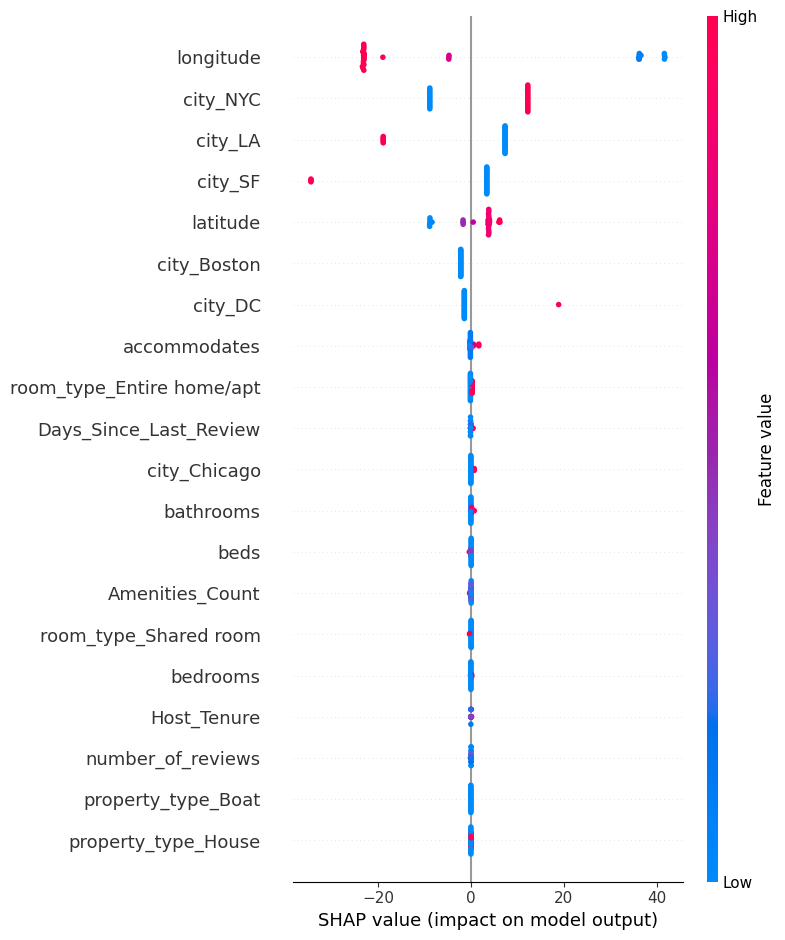

In [84]:
explainer = shap.Explainer(best_model, X_train)  # Assuming that the 'best_model' is a trained model and 'X_test' is the test data
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


### Predictive Performance Assessment

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
y_pred = best_model.predict(X_test) #Predicting the best model

In [87]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

c:\Users\Abhigyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
print("Root Mean Squared Error (RMSE):", rmse) #Printing the Root Mean Square Error value of the best model i.e. Linear Regressor
print("R-squared (R2):", r2) #Printing the Root Mean Square Error value of the best model i.e. Linear Regressor

Root Mean Squared Error (RMSE): 0.5472709559002467
R-squared (R2): 0.6584759457069886


In [89]:
residuals = y_test - y_pred

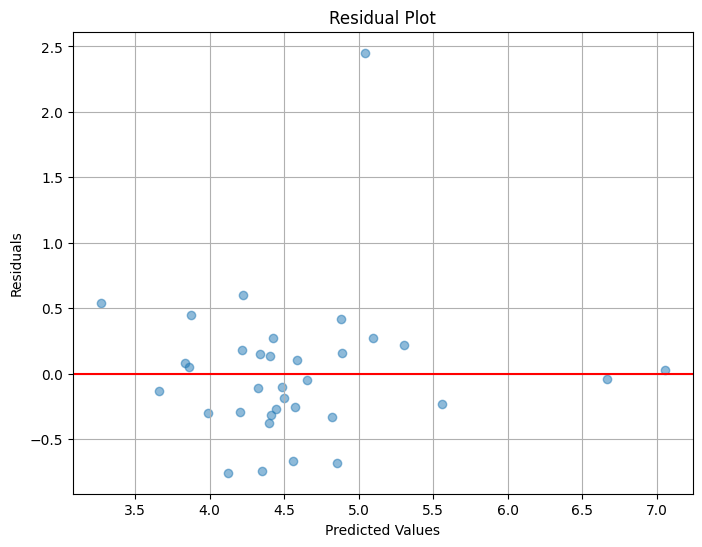

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')  
plt.grid(True)
plt.show()  #Plotting the Residuals plot